In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier


### Download Dataset

In [66]:
!wget https://raw.githubusercontent.com/alicevillar/titanic-kaggle/main/titanic.csv -O titanic.csv

--2023-08-22 06:48:11--  https://raw.githubusercontent.com/alicevillar/titanic-kaggle/main/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2023-08-22 06:48:11 (4.75 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [67]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# dataframe info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
print(f"Shape of dataset: {titanic_df.shape}")

Shape of dataset: (891, 12)


In [70]:
# see if null value is present
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
# titanic_df description
titanic_df.describe().style.format(precision=3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [72]:
# correlation of data
titanic_df.corr(numeric_only=True).style.background_gradient("coolwarm").format(precision=3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


In [73]:
# print the record that thave null property
records_with_null = titanic_df[titanic_df.isna().any(axis=1)]
records_with_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


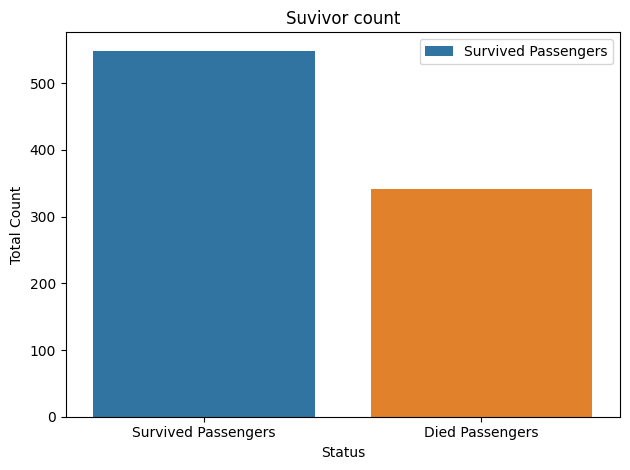

In [74]:
# predicting survivor based on other feature
legend_labels = ["Survived Passengers", "Died Passengers"]

sns.countplot(data=titanic_df, x="Survived")
plt.xlabel("Status")
plt.ylabel("Total Count")
plt.title("Suvivor count")
plt.xticks([0, 1], legend_labels)
plt.legend(labels=legend_labels)

plt.tight_layout()
plt.show()

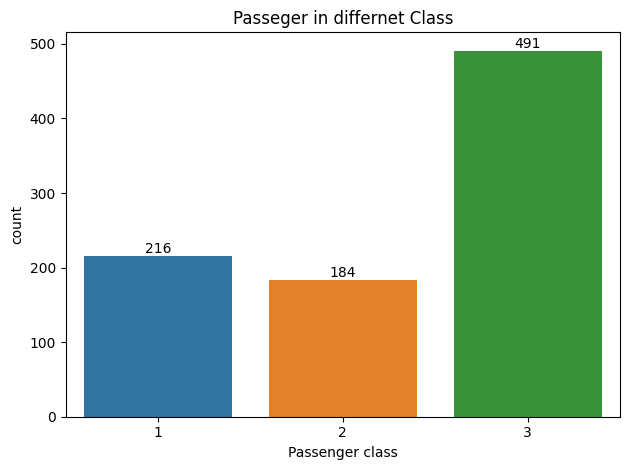

In [75]:
ax = sns.countplot(data=titanic_df, x="Pclass")
plt.title("Passeger in differnet Class")
plt.xlabel("Passenger class")
for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}",
              (p.get_x() + p.get_width() / 2., p.get_height()),
              xytext=(0, 5), ha="center", va="center",
              textcoords="offset points")

plt.tight_layout()
plt.show()

In [84]:
data_df = titanic_df[[ "SibSp", "Parch", "Fare", "Sex", "Survived", "Pclass"]]
# convert Sex to numerric value
data_df.Sex = data_df.Sex.map({"male": 0, "female": 1})
data_df.head()

<ipython-input-84-368543fbb6d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.Sex = data_df.Sex.map({"male": 0, "female": 1})


,SibSp,Parch,Fare,Sex,Survived,Pclass
0,1,0,7.2500,0,0,3
1,1,0,71.2833,1,1,1
2,0,0,7.9250,1,1,3
3,1,0,53.1000,1,1,1
4,0,0,8.0500,0,0,3


In [85]:
y_data = data_df["Survived"]
X_data = data_df.drop("Survived", axis=1)

print(f"Shape of X_data: {X_data.shape} and y_data: {y_data.shape}")

Shape of X_data: (891, 5) and y_data: (891,)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape} and y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} and y_test shape: {y_test.shape}")

Shape of X_train: (712, 5) and y_train shape: (712,)
X_test shape: (179, 5) and y_test shape: (179,)


In [87]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

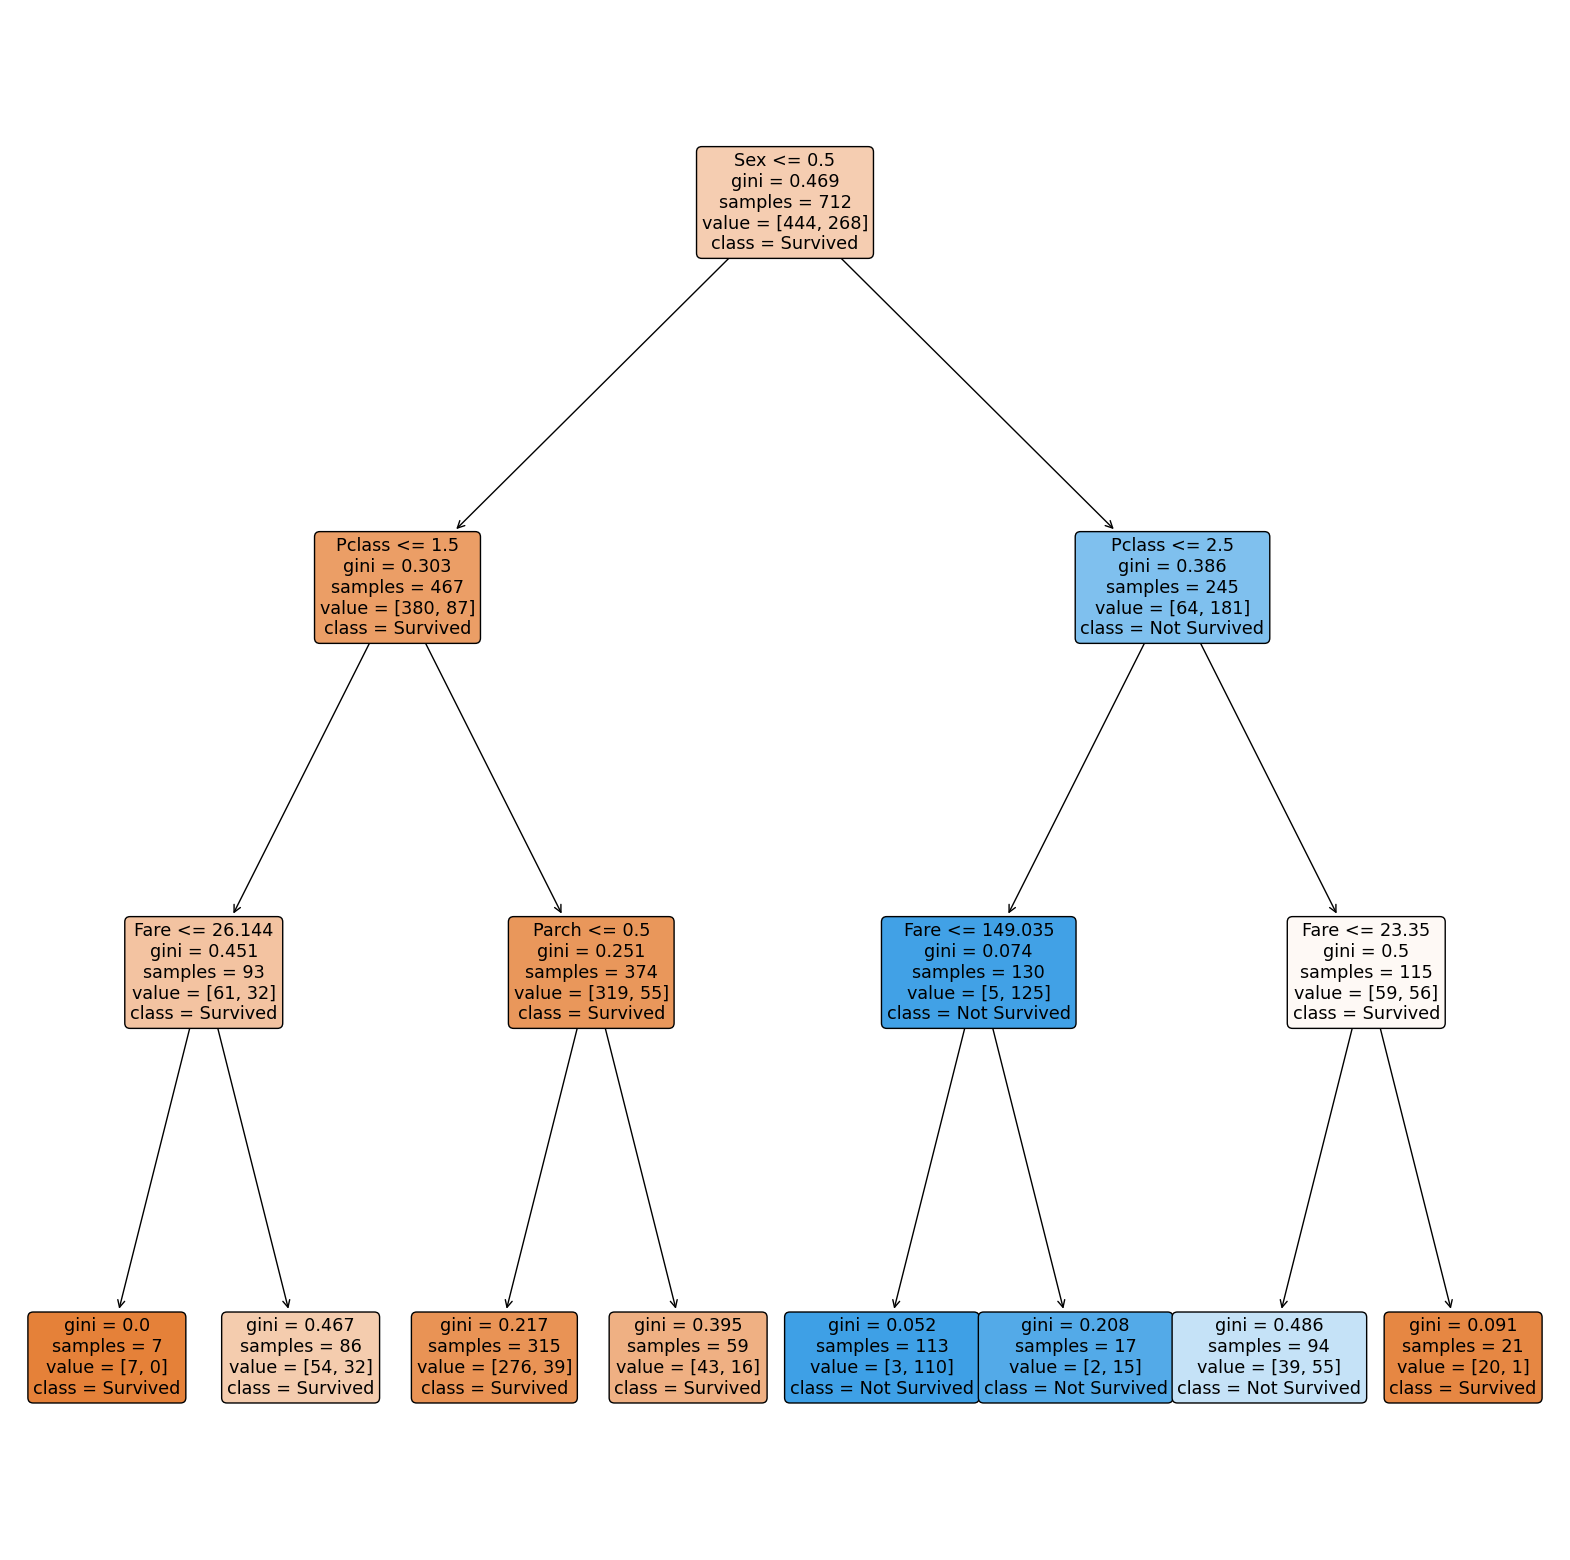

In [90]:
# plot the tree
plt.figure(figsize=(20, 20))
tee_plot = plot_tree(model_dt, feature_names=["SibSp", "Parch", "Fare", "Sex", "Pclass"],
          class_names=["Survived", "Not Survived"],
          filled=True, rounded=True)

### Metric

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [94]:

y_predict = model_dt.predict(X_test)
y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [98]:
# accuracy = tn + tp / tp + fp
accuracy = accuracy_score(y_test, y_predict)

# precison score
precison = precision_score(y_test, y_predict)

# recall score
recall = recall_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")
print(f"REcall: {recall}")
print(f"Precison: {precison}")


Accuracy: 0.7932960893854749
REcall: 0.6756756756756757
Precison: 0.7936507936507936


<Axes: >

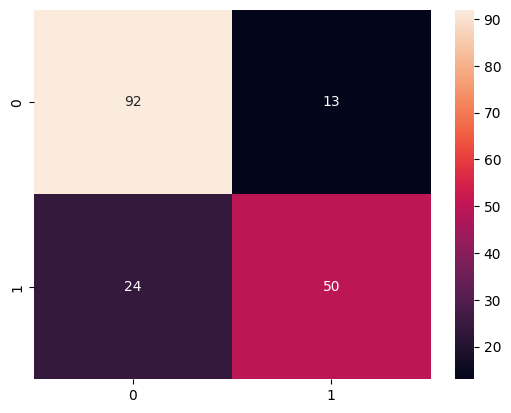

In [99]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)